# 합성곱 신경망을 사용한 컴퓨터 비전. part 1


## 시각 피질 구조


1. 합성곱 신경망을 사용한 컴퓨터 비전

   - 대뇌의 시각피질 연구에서 출발하여 1980년대부터 이미지 인식분야에서 활용

   - 일부 복잡한 이미지 처리문제에서 사람을 능가함

   - 이미지 검색, 자율주행, 영상자동분류 등에 활용 외에도 음성인식 자연어 처리등 다양한 분야에서 활용

2. 시각 피질 구조 -합성곱 신경망(CNN)은 데이비드 허블과 토르스텐 비셀의 시각피질 구조의 연구에서 시작됨

   - 시각피질 안의 많은 뉴런이 작은 국부수용장을 가짐

   - 뉴런의 수용장들은 서로 겹칠수 있어 합치면 전체 시야를 감쌈

   - 뉴런들은 시야의 일부범위 안에 있는 시각자극에 반응(어떤 뉴런은 수평선 이미지에만 반응 다른 뉴런은 각 다른 각도의 선분에 반응)

   - 어떤 뉴런은 큰 수용장을 가져 저수준 패턴이 조합된 복잡한 패턴에 반응(고수준 뉴런이 이웃한 저수준 뉴런의 출력에 기반)


## CNN의 필요성


기존의 신경망은 입력데이터의 형태가 무시된다. 예를 들어 아래와 같은 5x7 크기의 2차원 배열이 있다.

이를 2차원 형태로 출력하였을 때, 숫자 4의 모양이 잘 보이지만 이를 1차원 형태로 출력하였을 때는 숫자 4의 모양을 알아보기 어렵다.


In [40]:
num_4 = [
    [' ', '*', ' ', ' ', '*', ' ', ' '],
    [' ', '*', ' ', ' ', '*', ' ', ' '],
    [' ', '*', '*', '*', '*', '*', '*'],
    [' ', ' ', ' ', ' ', '*', ' ', ' '],
    [' ', ' ', ' ', ' ', '*', ' ', ' '],
]

print("이차원 배열로 출력:\n", end=' ')
print(*[num_4[i][j] if j !=
      6 else f'{num_4[i][j]}\n' for i in range(5) for j in range(7)])

print("일차원 배열로 출력:", end=' ')
print(*[num_4[i][j] for i in range(5) for j in range(7)])

이차원 배열로 출력:
   *     *    
   *     *    
   * * * * * *
         *    
         *    

일차원 배열로 출력:   *     *       *     *       * * * * * *         *             *    


기존의 fully connected layer는 일차원 배열로 입력을 받기에 이미지와 같은 2차원 이상의 형태의 데이터를 입력으로 받을 경우, 데이터의 형태를 무시하고 입력을 받게 된다.

이에 합성곱을 통하여 2차원 이미지의 특징을 추출한 뒤, 이를 fully connected layer에 입력으로 넣어주는 방식을 사용한다.

이를 Convolutional Neural Network(CNN)이라고 한다.


## CNN 레이어 구성


CNN의 주 목적인 2차원 이상의 데이터의 형상의 특징을 추출하는 것이다. 이를 위래 CNN은 크게 합성곱 층(Convolutional Layer)와 Pooling Layer, Fully Connected Layer로 구성된다.


### 합성곱 층


2차원 이미지의 특징을 추출하여 분류를 수행한다고 가정하자. 어떻게 2차원 이미지의 특징을 추출할 수 있을까?

<br>

CNN에서는 이미지의 특징을 추출하기 위해 필터를 사용한다.

필터는 일반적으로 3x3 또는 5x5의 크기를 가지며 필터의 모양에 따라서 추출되는 특징이 달라진다.

다음 이미지와 같이 서로 다른 필터를 사용하여 객체의 윤각선, 색상, 질감 등의 다양한 특성을 추출할 수 있음을 확인할 수 있다.

> 필터는 **커널**이라고도 불리며 한국어로 **수용장**이라고도 한다.

**(좌측은 필터의 모양이며 우측은 필터를 적용하였을 때 추출된 특성맵(Feature Map)을 시각화한 것이다)**

<img src="https://miro.medium.com/v2/resize:fit:994/1*ixuhX9vaf1kUQTWicVYiyg.png" alt="cnn feature visualizing">


#### 합성곱 연산


데이터(이미지)에 필터를 적용하는 것은 간단하다. 단순히 합성곱을 수행하는 것이다.

<img src="https://miro.medium.com/v2/resize:fit:1400/0*o-nPhPzDX5yCtTrs.gif" alt="">


위와 같이 원본 데이터의 크기가 5x5이고 필터의 크기가 3x3일 때, 필터를 적용하면 3x3 크기의 출력 데이터가 생성된다.

많은 경우 필터의 크기는 3x3 또는 5x5를 사용하며, 필터를 적용할 때는 필터를 일정 간격으로 이동시키면서 적용한다.

이때 필터를 이동시키는 간격을 **stride(스트라이드)**라고 한다. 위 그림에서는 stride가 1이다.

만약 stride가 2라면 위 예제의 출력 데이터의 크기는 2x2가 된다.

> 스트라이드 정의: 한 수용장과 다음 수용장 사이의 간격.

> 필터를 적용하여 생성된 출력값을 특성맵(Feature Map)이라고 한다. 필터에 포함된 모든 뉴런은 동일한 가중치와 편향을 사용하며 필터마다 사용되는 가중치와 편향은 다르다.


#### 패딩


위와 같이 필터를 적용하면 출력 데이터의 크기는 원본 데이터의 크기보다 작아진다.

이는 합성곱 연산을 몇 번이나 되풀이하는 심층 신경망에서는 문제가 될 수 있다. **합성곱 연산을 거칠 때마다 크기가 작아지면 어느 순간 크기가 너무 작아져서 신경망이 더 이상 학습을 할 수 없게 되기 때문이다.**

이를 해결하기 위해 원본 데이터의 가장자리에 0과 같은 값으로 채워진 테두리를 추가하여 필터를 적용하더라도 출력 데이터의 크기가 줄어들지 않도록 할 수 있다. 즉, **패딩은 주로 출력 크기를 조정할 목적으로 사용한다.**


<img src="https://i.ibb.co/Vvp6FRz/nagesh-cnn-intro-5.gif">


이전 예제와 동일하게 입력 데이터의 크기가 5x5이고 필터의 크기가 3x3일 때, 크기가 1인 패딩을 적용하면 입력 데이터의 크기와 동일한 5x5 크기의 출력 데이터가 생성됨을 확인할 수 있다.


#### 색상 이미지의 합성곱 연산


흑백 이미지가 아닌 색상을 있는 이미지의 경우 3차원 데이터셋이다.(RGB 차원 추가됨)

따라서 RGB에 해당하는 각각의 필터가 존재하여 필터의 크기는 3x3x3 또는 5x5x3와 같이 3차원으로 표현된다.

<img src="https://miro.medium.com/max/2560/1*ciDgQEjViWLnCbmX-EeSrA.gif">


#### Code


합성곱층과 필터를 적용하는 코드는 다음과 같다.


In [ ]:
import numpy as np
from sklearn.datasets import load_sample_image
import tensorflow as tf
import matplotlib.pyplot as plt

# 샘플 이미지를 로드합니다.
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# 2개의 필터를 만듭니다.
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # 수직선
filters[3, :, :, 1] = 1  # 수평선

# padding="SAME"일 경우 0으로 패딩을 추가하여 입력과 동일한 크기의 출력을 만든다.
# padding="VALID"일 경우 패딩을 추가하지 않고 필터의 크기만큼만 출력을 만든다.
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

#### 출력층 크기 계산


입력 크기를 ($I_h$, $I_w$), 필터 크기를 ($F_h$, $F_w$), 패딩을 $P$, 스트라이드를 $S$라고 하였을 때, 출력 크기는 다음과 같다.

($O_h$, $O_w$) = ($\frac{I_h + 2P - F_h}{S} + 1$, $\frac{I_w + 2P - F_w}{S} + 1$)

이때 5.7과 같이 소수점이 나올 경우, 소수점 이하를 버린다.


### 풀링 층


데이터의 세로, 가로 방향을 크기를 줄여 과대적합을 방지하며 입력의 변화에 강건하게 대응하기 위하여 풀링 층을 사용한다.

풀링 층은 뉴런의 가중치가 없으며 채널 수가 변화하지 않고 단순히 차원의 크기만을 줄인다.

풀링 또한 합성곱 연산과 동일하게 필터를 적용하며, 일반적으로 2x2 크기의 필터와 stride는 2를 사용한다.

해당 필터 내의 최댓값을 출력하는 최대 풀링(Max Pooling)과 해당 필터 내의 평균값을 출력하는 평균 풀링(Average Pooling), 합을 출력하는 합 풀링(Sum Pooling) 등이 있다.

<img src="https://www.bouvet.no/bouvet-deler/understanding-convolutional-neural-networks-part-1/_/attachment/inline/e60e56a6-8bcd-4b61-880d-7c621e2cb1d5:6595a68471ed37621734130ca2cb7997a1502a2b/Pooling.gif">


특히 최대 풀링의 경우 단순한 연산을 통해 파라미터 수가 많이 줄일 수 있으며 계산량, 메모리 사용량을 줄일 수 있고 작은 변화에 대한 어느 정도의 불변성(강건성)을 제공하여 가장 많이 사용된다.

최대값을 유지하여 보다 강한 특성이 학습에 사용되기에 평균 풀링에 비해 더 좋은 성능을 보인다.


#### Code


In [ ]:
# 최대 풀링
max_pooling = tf.keras.layers.MaxPool2D(pool_size=2)
output = max_pooling(images)

# 평균 풀링
avg_pooling = tf.keras.layers.AveragePooling2D(pool_size=2)
output = avg_pooling(images)

# 전역 평균 풀링
global_avg_pooling = tf.keras.layers.GlobalAvgPool2D()
output = global_avg_pooling(images)

### CNN 구조


CNN은 층을 부분적으로 연결하고 입력 이미지가 각 필터에 따라 동일한 가중치를 공유하기에 파라미터가 지나치게 많아지는 Fully Connected Layer의 단점을 극복할 수 있다.

또한 일반적으로 작은 커널이 파라미터와 계산량이 적고 더 나은 성능을 보이나 학습 시간이 오래 걸린다는 단점이 있다.

전형적인 CNN 구조는 다음과 같다.

이미지가 입력되면 합성곱 층과 풀링 층을 반복하며 특성을 추출한 뒤, 추출된 특성을 입력으로 받는 Fully Connected Layer를 통해 분류를 수행하게 되는 구조로 이루어져 있다.

<img src="https://d14b9ctw0m6fid.cloudfront.net/ugblog/wp-content/uploads/2020/12/1-4.png">


## MNIST 데이터셋을 이용한 CNN 구현


MNIST 패션 데이터셋을 통해 이미지 분류를 수행해보자.


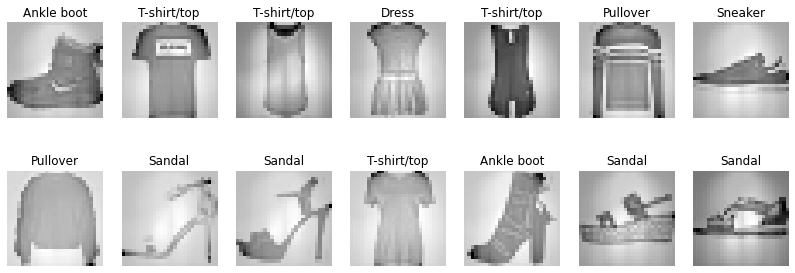

In [44]:
# Load data
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

label_names = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
                       'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

(X_train_full, y_train_full), (X_test,
                               y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

X_train.shape, X_valid.shape, X_test.shape

# show 10 images of X_train with 2x7 grid with label name
plt.figure(figsize=(14, 5))
for index, image in enumerate(X_train[:14]):
    plt.subplot(2, 7, index + 1)
    plt.imshow(image.reshape(28, 28), cmap="binary")
    plt.axis('off')
    plt.title(label_names[y_train[index]], fontsize=12)
plt.show()

In [45]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3,
                        activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64,               # 64개의 필터
                  kernel_size=7,            # 필터의 크기는 7x7
                  input_shape=[28, 28, 1]),  # 입력의 크기는 28x28x1
    keras.layers.MaxPooling2D(pool_size=2),  # 풀링의 크기는 2x2
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),                            # 3차원을 1차원으로 변환
    keras.layers.Dense(units=128, activation='relu'),  # 128개의 뉴런
    keras.layers.Dropout(0.5),                         # 50%의 드롭아웃
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),  # 10개의 출력 노드
])

model.summary()

2023-12-03 13:39:14.518834: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-03 13:39:14.519248: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                             

In [47]:
model.compile(loss="sparse_categorical_crossentropy",  # 다중 분류 손실 함수
              optimizer="nadam",                      # nadam: RMSProp + Nesterov
              metrics=["accuracy"])                   # 정확도를 측정

history = model.fit(X_train, y_train, epochs=10,      # 10번 반복하여 모델을 학습
                    validation_data=(X_valid, y_valid))

Epoch 1/10


2023-12-03 13:40:05.707096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.4512 - accuracy: 0.8424

2023-12-03 13:40:58.652777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 55s 31ms/step - loss: 0.4512 - accuracy: 0.8424 - val_loss: 0.3218 - val_accuracy: 0.8802
Epoch 2/10
1719/1719 [==============================] - 53s 31ms/step - loss: 0.3196 - accuracy: 0.8856 - val_loss: 0.2763 - val_accuracy: 0.8984
Epoch 3/10
1719/1719 [==============================] - 53s 31ms/step - loss: 0.2860 - accuracy: 0.8983 - val_loss: 0.2794 - val_accuracy: 0.9000
Epoch 4/10
1719/1719 [==============================] - 53s 31ms/step - loss: 0.2574 - accuracy: 0.9096 - val_loss: 0.2734 - val_accuracy: 0.8984
Epoch 5/10
1719/1719 [==============================] - 53s 31ms/step - loss: 0.2401 - accuracy: 0.9142 - val_loss: 0.2809 - val_accuracy: 0.8990
Epoch 6/10
1719/1719 [==============================] - 53s 31ms/step - loss: 0.2228 - accuracy: 0.9211 - val_loss: 0.2569 - val_accuracy: 0.9026
Epoch 7/10
1719/1719 [==============================] - 54s 31ms/step - loss: 0.2133 - accuracy: 0.9237 - val_loss: 0.2594 - val_accura

In [48]:
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)

313/313 [==============================] - 3s 11ms/step - loss: 0.2855 - accuracy: 0.9068


2023-12-03 13:55:10.694609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


## CNN 모델 발전


### LeNet-5


출력층이 각 뉴런에서 입력 벡터와 가중치 벡터 사이의 유클리드 거리를 측정하여 이미지가 얼마나 특성 숫자 클래스에 속하는지 특정한다.


### AlexNet


2012 ImageNet 대회에서 우승한 CNN 모델로 Top-5 에러율 17%이며 다음과 같은 특징을 가진다.

- 드롭 아웃 50% 적용

- 합성곱 층을 연속하여 쌓음

- 수평 뒤집기, 간격 이동, 등을 통해 데이터 증식 수행

- 데이터 정규화(LRN) 사용


### GoogleNet


2014sus ImageNet 대회에서 우승한 CNN 모델로 Top-5 에러율 7%이며 다음과 같은 특징을 가진다.

- 인셉션 모듈 사용하여 AlexNet보다 파라미터 수를 10배 이상 줄임

- ReLU 활성화 함수 사용

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ_2Q90FBW0J5hNZOI5f96548KCfhMHzQ7w5Q&usqp=CAU">


### VGGNet


2014년 ImageNet 대회에서 2등한 CNN 모델로 Top-5 에러율 8%이며 다음과 같은 특징을 가진다.

- 16(혹은 19)개의 층으로 많은 레이어로 구성된 모델

- 많은 개수의 필터를 사용하지만 3x3 크기의 작은 필터만 사용함.

<img src="https://blog.kakaocdn.net/dn/cvclSk/btrF2Ne8qKG/KzDQiwpP0fSkaZvRdnCE1K/img.png">


### ResNet


2015년 ImageNet 대회에서 우승한 CNN 모델로 Top-5 에러율 3.6%이며 다음과 같은 특징을 가진다.

- 잔차 네트워크(Residual Network) 사용

- 152개의 층으로 깊게 구성되어 있으나 파라미터 수는 VGGNet보다 8배 이상 적음

- 많은 층으로 인한 기울기 소실 문제를 해결하기 위해 **잔차 유닛(RU)** 을 통한 **스킵 연결(skip connection)** 을 사용

- 각 잔차 유닛은 배치 정규화(BN)과 ReLU 활성화 함수, 3x3 크기의 필터를 사용한다.

- 특성맵의 수는 진차 유닛 층에 따라 64, 128, 256, 512 등으로 2배씩 증가하며, 특성맵의 크기는 32x32, 16x16, 8x8, 4x4 등으로 절반씩 감소한다.

<img src="https://oi.readthedocs.io/en/latest/_images/prev_cnn_vs_residual_learning.png">


### Xception


2016년 ImageNet 대회에서 우승한 CNN 모델로 Top-5 에러율 3%이며 다음과 같은 특징을 가진다.

- GoogleNet과 ResNet의 장점을 결합한 모델로 GoogleNet의 인셉션 모듈 대신 깊이별 분리 합성곱 층 사용

- 분리 합성곱의 공간별 패턴인식을 통해 형태를 인식하고 깊이별 패턴인식을 통해 채널 사이의 패턴을 인식한다.


### SENet


2017년 ImageNet 대회에서 우승한 CNN 모델로 Top-5 에러율 2.3%이며 다음과 같은 특징을 가진다.

- GoogleNet의 인셉션 모델과 ResNet의 잔차 유닛을 결합한 모델로 채널 간의 의존성을 고려한 채널 측정 모듈(SE)을 사용한다.

- 각 SE black은 전역평균 풀링층 -> 밀집층 -> ReLU 활성화 함수 -> 밀집층 -> 시그모이드 활성화 함수로 구성된다.

<img src="https://www.researchgate.net/publication/356746012/figure/fig2/AS:1098400380530690@1638890466308/Residual-block-ResB-and-SE-block.ppm">


### MobileNet


2017년 구글에서 개발한 경량화된 CNN 모델로 다음과 같은 특징을 가진다.

- 깊이별 분리 합성곱(Depthwise Separable Convolution) 사용

  - 공간에 대한 분석인 depthwise convolution 연산을 수행하고, 채널에 대한 분석인 pointwise convolution 연산을 수행한다.

  - 커널 크기가 3인 경우 연산량이 9배 감소한다.

<img src="https://velog.velcdn.com/images%2Fwoojinn8%2Fpost%2F15a0d811-0096-4ba0-902b-cbfc4d7a405a%2Fdepthwise%20separabel%20convolution.png">


### AutoML


AutoML은 기계학습을 자동화하는 기술로, AutoML을 통해 CNN 모델의 구조를 자동으로 탐색할 수 있다.

사람이 직접 CNN 모델의 구조를 설계(Handcrafted)하는 것보다 AutoML을 통해 자동으로 탐색한 CNN 모델의 성능이 더 좋은 경우가 많다.

아래 다이어로그에서 좌측 상단에 있는 AutoML을 통해 탐색한 CNN 모델의 성능이 사람이 직접 설계한 CNN 모델의 성능보다 더 좋은 것을 확인할 수 있다.

<img src="https://dl.acm.org/cms/attachment/7497be08-efc2-4c58-b2b0-84147df12d10/todaes2703-20-f06.jpg">
